## *Artificial Neural Networks*
### Aprendizagem Automática e Ciências de Dados

#### Grupo 4
#### Dinis Carraça Nº 14058 & José Feiteira Nº 14300

In [1]:
%reset -f

## Requirements

In [43]:
pip install -r requirements.txt

   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 3.6 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----------- ---------------------------- 0.8/2.8 MB 4.9 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.8 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 5.6 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   - -------------------------------------- 1.6/38.1 MB 9.0 MB/s eta 0:00:05
   --- ------------------------------------ 3.7/38.1 MB 9.5 MB/s eta 0:00:04
   ------ --------------------------------- 6.0/38.1 MB 10.1 MB/s eta 0:00:04
   --------- ------------------------------ 8.7/38.1 MB 10.9 MB/s eta 0:00:03
   ------------ --------------------------- 11.8/38.1 MB 11.7 MB/s eta 0:00:03
   --------------- ------------------------ 15.2/38.1 MB 12.4 MB/s eta 0:00:02
   -----------------

## Imports

In [78]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## 0. Operações Gerais

In [65]:
df = pd.read_csv('df_group4_classe.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   daily_active_users_per_1k       255 non-null    float64
 1   avg_session_duration            255 non-null    float64
 2   screens_per_session             255 non-null    float64
 3   conversion_rate                 255 non-null    float64
 4   retention_30d                   255 non-null    float64
 5   crash_rate_per_1k               255 non-null    float64
 6   avg_latency_ms                  255 non-null    float64
 7   support_tickets_per_1k_users    255 non-null    float64
 8   bug_fix_time_days               255 non-null    float64
 9   deployment_frequency_per_month  255 non-null    float64
 10  nps_score                       255 non-null    float64
 11  app_store_rating                255 non-null    float64
 12  revenue_per_user                255 

,daily_active_users_per_1k,avg_session_duration,screens_per_session,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user,classe
0,1.365073,0.767327,0.261780,0.676673,-0.618089,1.463434,1.076442,0.883539,-0.825774,0.216563,-0.637735,-0.498733,0.016407,-0.014631,2
1,0.014407,-0.053756,-0.834279,0.398714,-0.686036,0.679254,-0.292061,0.577403,-0.187967,-0.608288,0.158461,1.145959,0.262016,-0.139845,3
2,-0.794565,-1.364828,-0.794455,-1.274230,0.337830,-0.048939,-0.509421,-0.112958,0.281242,1.655167,-0.815757,-0.610258,-0.216664,0.849675,5
3,-0.025550,-0.712952,-0.362806,-0.316390,-1.306883,-0.596438,-0.276956,-0.117813,-0.603625,0.580689,0.335633,-0.379222,-0.537343,0.641942,1
4,-0.008756,0.934050,1.951810,0.211716,0.407337,-0.115187,-0.569544,1.330020,1.050071,0.917485,0.273601,-0.347407,1.275343,0.369823,4


In [88]:
x = df.drop(columns =['classe'])
y = df['classe'] # Output
print(x.shape)

y = y - 1

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state = 42)

scaler = StandardScaler()
x_treino = scaler.fit_transform(x_treino)
x_teste = scaler.transform(x_teste)

x_treino_scaled = scaler.fit_transform(x_treino)  # NumPy array
x_teste_scaled  = scaler.transform(x_teste)       # NumPy array

y_treino_cat = to_categorical(y_treino, num_classes=5)
y_teste_cat = to_categorical(y_teste, num_classes=5)

feature_names = x.columns

(255, 14)


## 1. Criação da ANN

In [70]:
modelo = Sequential([
    Dense(64, activation='relu', input_shape=(x_treino.shape[1],)), # Layer 1 com 64 Neurónios Função de Ativação ReLu
    Dropout(0.3), # Evitar Overfitting
    Dense(32, activation='relu'), # Layer 2, metade dos neurónios, combina as features aprendidas na layer 1
    Dense(5, activation='softmax')  # Layer de output, 5 neurónios porque só queremos 5 classes, 
])

modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

modelo.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,205 (12.52 KB)

 Trainable params: 3,205 (12.52 KB)

 Non-trainable params: 0 (0.00 B)

Como podemos reparar o nosso modelo tem cerca de 3200 parâmetros com os quais treinará, pelo facto de se tratar de uma modelo simples e leve, este processo será rápido.

Existe também pouco risco de acontecer overfitting para datasets de pequeno / médio tamanho, como é o caso do nosso.

Se por ventura ocorrer overfit ou underfit:

- Overfit - Aumentar o dropout e diminuir o número de neurónios utilizados;
- Underfit - Acrescentar neurónios e/ou layers;


## 2. Treinar o modelo

In [71]:
historia = modelo.fit(
    x_treino, y_treino_cat,
    validation_split=0.3, # 30% dos dados para validação do modelo
    epochs=50, # Quantidade de vezes que o modelo percorre o dataset de treino
    batch_size=32, # Quantidade de samples por vez
    verbose=1 
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.2823 - loss: 1.6001 - val_accuracy: 0.2407 - val_loss: 1.5574
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2984 - loss: 1.5445 - val_accuracy: 0.3333 - val_loss: 1.5072
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3306 - loss: 1.4971 - val_accuracy: 0.4259 - val_loss: 1.4612
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4435 - loss: 1.4429 - val_accuracy: 0.5185 - val_loss: 1.4170
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5000 - loss: 1.3623 - val_accuracy: 0.5556 - val_loss: 1.3766
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4032 - loss: 1.3346 - val_accuracy: 0.6111 - val_loss: 1.3364
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5000 - loss: 1.3286 - val_accuracy: 0.6111 - val_loss: 1.2976
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5565 - loss: 1.2447 - val_accuracy: 0.6111 - val_loss: 1.2606

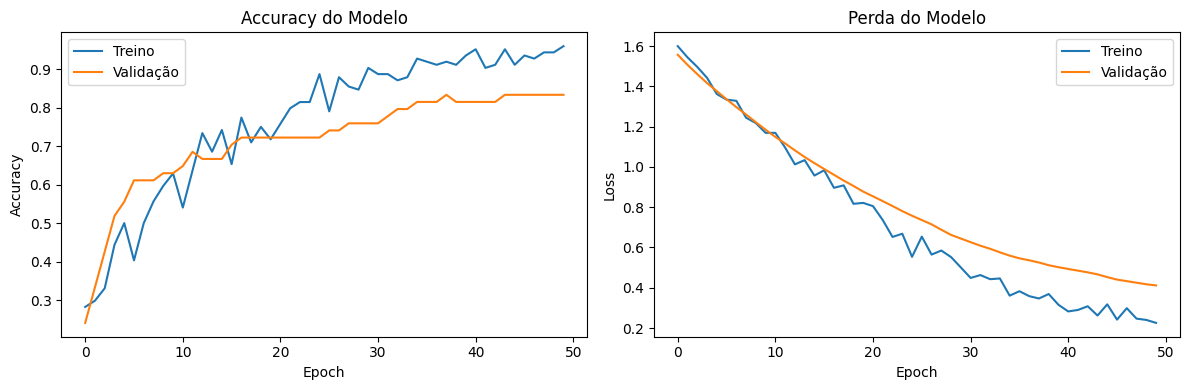

In [72]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(historia.history['accuracy'], label='Treino')
plt.plot(historia.history['val_accuracy'], label='Validação')
plt.title('Accuracy do Modelo')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig("accuracy_modelo_st.png", dpi=300, bbox_inches='tight')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(historia.history['loss'], label='Treino')
plt.plot(historia.history['val_loss'], label='Validação')
plt.title('Perda do Modelo')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig("loss_modelo_st.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()

Como podemos ver, a accuracy do modelo foi aumentando progressivamente consoante o números de epochs percorrido, os valores desta para a validação são menores do que no treino, expectável, apesar disso o alto valor, ~85% mostra que o modelo consegue prever corretamente dados ainda não vistos.

A perda decresce com cada epoch concluído, mostrando que o modelo cria previsões corretas e confiantes no treino. Contudo a perda na validação apresenta um valor de quase o dobro quando comparada ao treino, ~50%, o que mostra um ligeiro overfit na validação.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


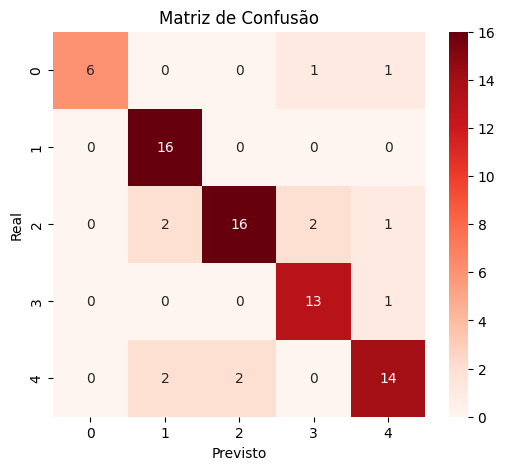

In [73]:
y_pred = modelo.predict(x_teste)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes = y_pred_classes


cm = confusion_matrix(y_teste, y_pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.savefig("matriz_confusão_m1.png", dpi=300, bbox_inches='tight')

plt.show()


A matriz de confusão mostra uma clara falha na previsão correta da classe 0, valor 6 na matriz, apesar disso as restantes classes têm todas valores semelhantes.

Isto mostra que o modelo mesmo assim realiza um bom trabalho no ambiente geral do dataset.

In [74]:
print(classification_report(y_teste, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.80      1.00      0.89        16
           2       0.89      0.76      0.82        21
           3       0.81      0.93      0.87        14
           4       0.82      0.78      0.80        18

    accuracy                           0.84        77
   macro avg       0.86      0.84      0.85        77
weighted avg       0.85      0.84      0.84        77



Das métricas acima conseguimos chegar às conclusões: 
- O modelo prevê com sucesso a maioría das classes;
- As classes 0 e 2, mostram ser as onde erra mais, valores de recall abaixo de ~80%;
- Existe uma boa distribuição nas classes, macro e weighted average com valores perto dos 90%;

Ou seja, mesmo apesar do overfitting detetado anteriormente, não existe nenhuma classe com maior agregação de valores.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


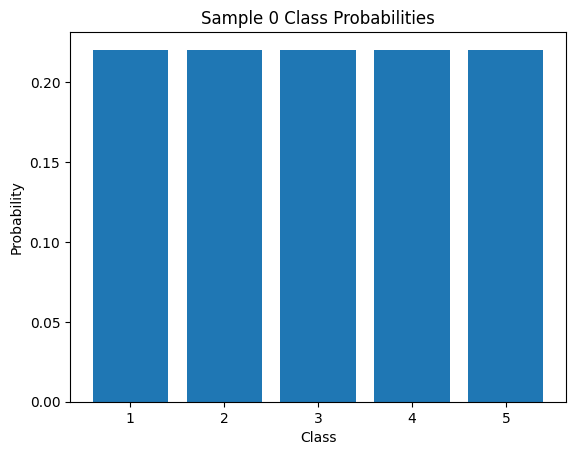

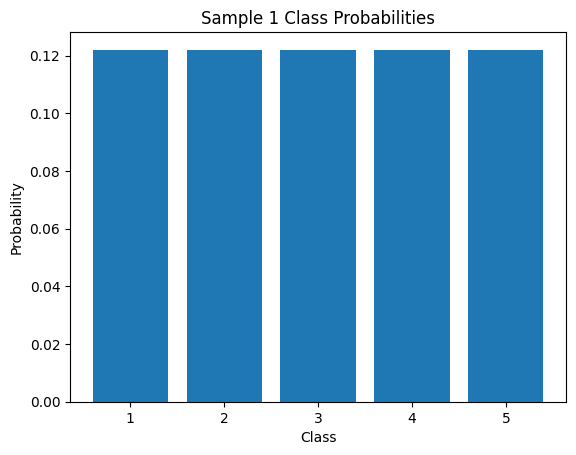

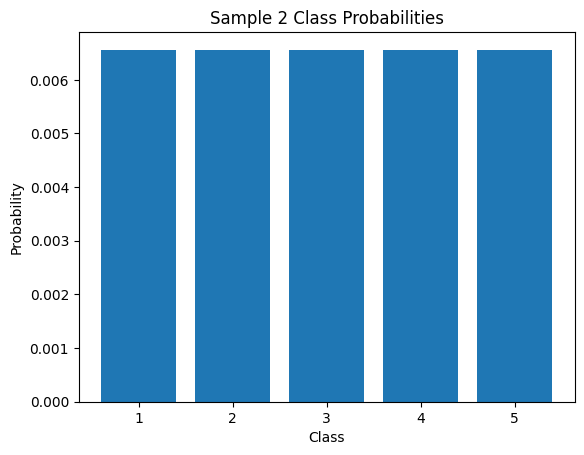

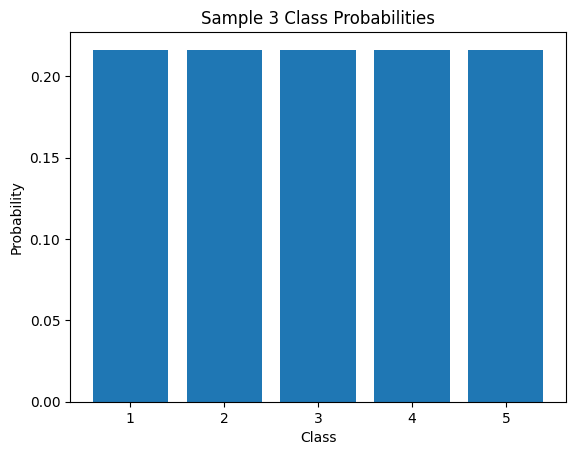

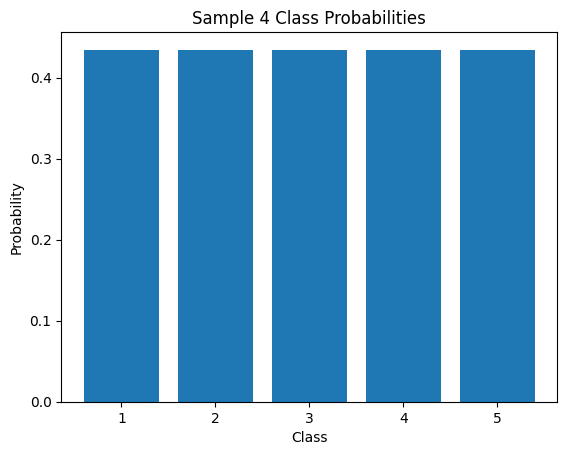

In [75]:
sample = x_teste[:5]
probs = modelo.predict(sample)[0]

for i, p in enumerate(probs):
    plt.figure()
    plt.bar(np.arange(1,6), p)
    plt.title(f"Sample {i} Class Probabilities")
    plt.xlabel("Class")
    plt.ylabel("Probability")
    plt.show()

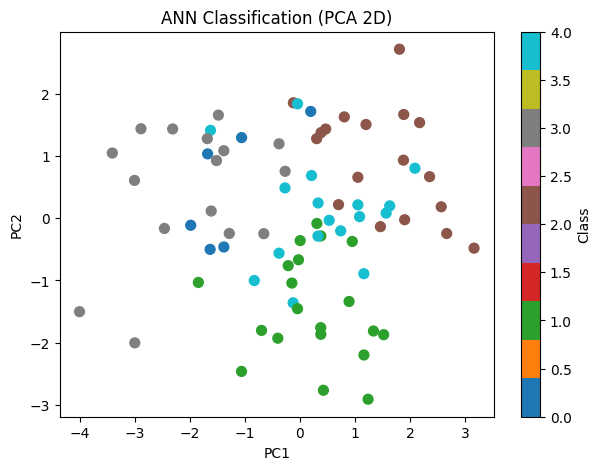

In [76]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_teste)

plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred_classes, cmap='tab10', s=50)
plt.title("ANN Classification (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Class")
plt.show()

## 3. Output

In [89]:
# 1) prediction function: ANN -> probabilities
def f_predict(X):
    # X is a NumPy array with shape (n_samples, 14)
    return modelo.predict(X)   # shape (n_samples, 5)

# 2) choose a small background set from the *NumPy* training data
n_background = min(100, x_treino.shape[0])
idx = np.random.choice(x_treino.shape[0], n_background, replace=False)
background = x_treino[idx]    # shape (n_background, 14)

explainer = shap.KernelExplainer(f_predict, background)

# 3) subset of test data to explain
X_explain = x_teste[:200]     # shape (n_samples_to_explain, 14)
shap_values = explainer.shap_values(X_explain)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


  0%|          | 0/77 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  1%|▏         | 1/77 [00:12<16:13, 12.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


  3%|▎         | 2/77 [00:25<15:46, 12.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


  4%|▍         | 3/77 [00:37<15:30, 12.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


  5%|▌         | 4/77 [00:50<15:21, 12.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


  6%|▋         | 5/77 [01:02<14:58, 12.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


  8%|▊         | 6/77 [01:15<14:41, 12.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


  9%|▉         | 7/77 [01:27<14:38, 12.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 10%|█         | 8/77 [01:40<14:35, 12.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 12%|█▏        | 9/77 [01:52<14:05, 12.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 13%|█▎        | 10/77 [02:05<13:52, 12.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 14%|█▍        | 11/77 [02:17<13:41, 12.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 16%|█▌        | 12/77 [02:30<13:31, 12.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 17%|█▋        | 13/77 [02:42<13:18, 12.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 18%|█▊        | 14/77 [02:55<13:10, 12.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 19%|█▉        | 15/77 [03:07<12:57, 12.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 21%|██        | 16/77 [03:20<12:50, 12.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 22%|██▏       | 17/77 [03:33<12:38, 12.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 23%|██▎       | 18/77 [03:45<12:18, 12.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 25%|██▍       | 19/77 [03:57<12:01, 12.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 26%|██▌       | 20/77 [04:10<11:55, 12.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 27%|██▋       | 21/77 [04:23<11:43, 12.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 29%|██▊       | 22/77 [04:36<11:47, 12.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 30%|██▉       | 23/77 [04:48<11:19, 12.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 31%|███       | 24/77 [05:01<11:10, 12.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 32%|███▏      | 25/77 [05:14<10:56, 12.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 34%|███▍      | 26/77 [05:26<10:39, 12.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 35%|███▌      | 27/77 [05:39<10:27, 12.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 36%|███▋      | 28/77 [05:51<10:09, 12.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 38%|███▊      | 29/77 [06:04<10:04, 12.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 39%|███▉      | 30/77 [06:16<09:51, 12.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 40%|████      | 31/77 [06:29<09:38, 12.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 42%|████▏     | 32/77 [06:41<09:22, 12.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 43%|████▎     | 33/77 [06:54<09:08, 12.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 44%|████▍     | 34/77 [07:06<08:56, 12.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 45%|████▌     | 35/77 [07:19<08:45, 12.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 47%|████▋     | 36/77 [07:32<08:38, 12.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 48%|████▊     | 37/77 [07:44<08:17, 12.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 49%|████▉     | 38/77 [07:56<08:05, 12.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 51%|█████     | 39/77 [08:08<07:50, 12.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 52%|█████▏    | 40/77 [08:21<07:43, 12.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 53%|█████▎    | 41/77 [08:33<07:26, 12.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 55%|█████▍    | 42/77 [08:45<07:12, 12.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 56%|█████▌    | 43/77 [08:58<07:00, 12.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 57%|█████▋    | 44/77 [09:10<06:47, 12.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 58%|█████▊    | 45/77 [09:23<06:40, 12.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 60%|█████▉    | 46/77 [09:35<06:25, 12.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 61%|██████    | 47/77 [09:48<06:12, 12.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 62%|██████▏   | 48/77 [10:00<06:00, 12.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 64%|██████▎   | 49/77 [10:13<05:49, 12.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 65%|██████▍   | 50/77 [10:25<05:37, 12.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 66%|██████▌   | 51/77 [10:38<05:22, 12.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 68%|██████▊   | 52/77 [10:50<05:10, 12.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 69%|██████▉   | 53/77 [11:03<05:00, 12.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 70%|███████   | 54/77 [11:16<04:52, 12.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 71%|███████▏  | 55/77 [11:28<04:35, 12.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 73%|███████▎  | 56/77 [11:40<04:21, 12.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 74%|███████▍  | 57/77 [11:53<04:08, 12.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 75%|███████▌  | 58/77 [12:06<03:59, 12.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 77%|███████▋  | 59/77 [12:18<03:46, 12.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 78%|███████▊  | 60/77 [12:30<03:31, 12.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 79%|███████▉  | 61/77 [12:43<03:18, 12.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 81%|████████  | 62/77 [12:55<03:06, 12.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 82%|████████▏ | 63/77 [13:08<02:55, 12.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 83%|████████▎ | 64/77 [13:20<02:40, 12.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 84%|████████▍ | 65/77 [13:32<02:28, 12.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 86%|████████▌ | 66/77 [13:44<02:15, 12.30s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 87%|████████▋ | 67/77 [13:57<02:04, 12.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 88%|████████▊ | 68/77 [14:10<01:52, 12.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 90%|████████▉ | 69/77 [14:22<01:39, 12.42s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step


 91%|█████████ | 70/77 [14:35<01:28, 12.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 92%|█████████▏| 71/77 [14:48<01:16, 12.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 94%|█████████▎| 72/77 [15:01<01:04, 12.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


 95%|█████████▍| 73/77 [15:13<00:50, 12.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 96%|█████████▌| 74/77 [15:25<00:37, 12.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 97%|█████████▋| 75/77 [15:38<00:24, 12.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 99%|█████████▊| 76/77 [15:51<00:12, 12.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
6488/6488 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


100%|██████████| 77/77 [16:04<00:00, 12.52s/it]


In [90]:
for c in range(5):
    print(f"Class {c} feature impact")
    shap.summary_plot(
        shap_values[c],
        X_explain,
        feature_names=feature_names,
        show=True
    )


Class 0 feature impact


C:\Users\dinis\AppData\Local\Temp\ipykernel_6948\3384465388.py:3: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [15]:
S = ["1", "2", "3"]
A = ['L', 'R']

L = np.array([[1, 0, 0],[0.8, 0.2, 0],[0, 0.8, 0.2]])

R = np.array([[0.2, 0.8, 0], [0, 0.2, 0.8], [0, 0, 1]])

P = [L,R]

Re = np.array([[0,0], [0,0], [1,1]])

gama = 0.9

steps = 1000
current_state = 0
num_actions = len(A)
num_states = len(S)

data_point = np.zeros((steps,4))

for t in range (steps):
    action = np.random.choice(num_actions, p = [0.5, 0.5])
    next_state = np.random.choice(num_states, p = P[action][current_state,:])
    reward = Re[current_state,action]
    data_point[t] = [current_state, action, reward, next_state]
    current_state = next_state

PestL = np.zeros((num_states, num_states))
PestR = np.zeros((num_states, num_states))
Pest = [PestL, PestR]

Rest = np.zeros((num_states, num_actions))
st_act_counter = np.zeros((num_states, num_actions))
st_L_nst_counter = np.zeros((num_states, num_states))

st_R_nst_counter = np.zeros((num_states, num_states))

st_act_nst_counter = [st_L_nst_counter, st_R_nst_counter]

for t in range (steps):
    current_state, action, reward, next_state = data_point[t]
    st_act_counter[int(current_state), int(action)]+=1
    st_act_nst_counter[int(action)][int(current_state), int(next_state)] += 1
    Rest[int(current_state), int(action)] += reward

Pest [0] = st_act_nst_counter[0] / st_act_counter[:,0,None]
Pest[1] = st_act_nst_counter[1] / st_act_counter[:,1,None]
Rest = Rest / st_act_counter[2,:]




In [17]:
print(Pest[0])
print("\n")
print(Pest[1])
print("\n")
print(Rest)

[[1.         0.         0.        ]
 [0.81318681 0.18681319 0.        ]
 [0.         0.76969697 0.23030303]]


[[0.20744681 0.79255319 0.        ]
 [0.         0.22560976 0.77439024]
 [0.         0.         1.        ]]


[[0. 0.]
 [0. 0.]
 [1. 1.]]


### Value Based

In [25]:
S = ["1", "2", "3"]
A = ['L', 'R']

L = np.array([[1, 0, 0],[0.8, 0.2, 0],[0, 0.8, 0.2]])

R = np.array([[0.2, 0.8, 0], [0, 0.2, 0.8], [0, 0, 1]])

P = [L,R]

Re = np.array([[0,0], [0,0], [1,1]])

gama = 0.9

def egreedy(Q, state, eps):
    p = np.random.random()
    if p < eps:
        action = np.random.choice(num_actions)
    else:
        action = np.argmax(Q[state,:])
    return action

steps = 1000000
num_actions = len(A)
num_states = len(S)
alpha = 0.3

Q = np.ones((num_states, num_actions))
state = 0

for t in range (steps):
    action = egreedy(Q, state, 0.05)
    next_state = np.random.choice(num_states, p = P[action][state,:])
    reward = Re[state, action]

    Q[state, action] += alpha * (reward + gama * np.max(Q[next_state, :]) - Q[state, action])
    state = next_state

print(Q)
    

[[ 7.00593468  7.96477002]
 [ 7.38423378  8.84449156]
 [ 9.26747982 10.        ]]
